In [10]:
# Importando bibliotecas necessárias
import geopandas as gpd
import os
import matplotlib.pyplot as plt

def path_lista():
    # Define os caminhos dos shapefiles para municípios, aeroportos e rodovias
    path_municipios = os.getcwd() + '//dados//municipios.shp'
    path_aeroportos = os.getcwd() + '//dados//aeroportos.shp'
    path_rodovias = os.getcwd() + '//dados/rodovias.shp'
    
    return [path_municipios, path_aeroportos, path_rodovias]

def open_shapefile():
    # Lê os shapefiles usando GeoPandas e retorna uma lista de DataFrames
    return [gpd.read_file(i) for i in path_lista()]

def filter_municipios(state, shape):
    # Filtra os municípios com base no estado desejado
    return shape[0][shape[0]['uf'] == state]

def airports(shape, municipio_filtrado):
    # Realiza uma junção espacial para encontrar aeroportos dentro dos municípios filtrados
    gdf = gpd.sjoin(shape[1], municipio_filtrado, predicate='within')
    
    # Calcula estatísticas sobre tipos de aeroportos e pavimentos
    total_airports = gdf['TipoAero'].value_counts()
    total_pavi = gdf['pavimento'].value_counts()
    
    return gdf, total_airports, total_pavi

def roads(shape, municipio_filtrado):
    # Realiza uma interseção espacial entre rodovias e municípios filtrados
    gdf = gpd.overlay(shape[2], municipio_filtrado, how='intersection')
    
    # Cria uma cópia e projeta para um sistema de coordenadas específico (5880)
    gdf_proj = gdf.copy()
    gdf_proj['geometry'] = gdf_proj['geometry'].to_crs(epsg=5880)
    
    # Calcula a distância das rodovias e agrupa por tipo de rodovia
    gdf_proj['distance_km'] = gdf_proj['geometry'].length / 1000
    distancias = gdf_proj.groupby('nm_tipo_tr').agg('sum')
    
    return gdf, distancias

def run(state):
    # Carrega os shapefiles
    shape = open_shapefile()
    
    # Filtra os municípios
    municipio_filter = filter_municipios(state, shape)
    
    # Analisa aeroportos
    gdf_airports, aeroportos, pavimentos = airports(shape, municipio_filter)
    
    # Analisa rodovias
    gdf_roads, stats_distance = roads(shape, municipio_filter)
    
    # Imprime estatísticas
    # print(f'Estatísticas do Estado {state}')
    # print(aeroportos)
    # print(pavimentos)
    # print(stats_distance)
    
    # Plota os aeroportos e rodovias
    gdf_airports.plot()
    gdf_roads.plot()
    
    return municipio_filter, gdf_airports, gdf_roads

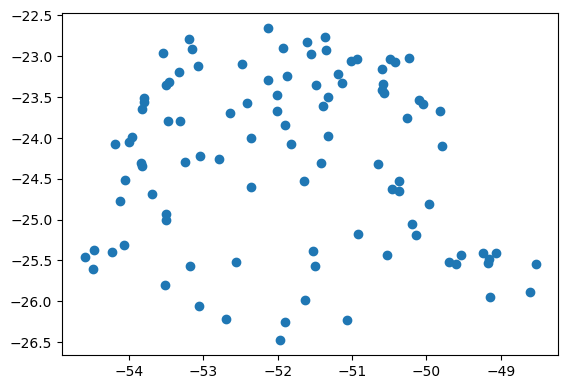

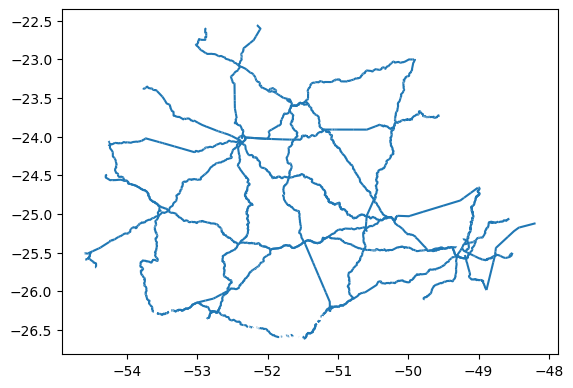

In [12]:
municipio_filter, gdf_airports, gdf_roads = run('PR')

In [21]:
municipio_filter['area'] = municipio_filter['geometry'].to_crs(epsg = 5880).area/1000000
municipio_filter

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
847,901,5894,4111555,Ivaté,PR,Sul,410.926050,"POLYGON ((-53.44312 -23.39659, -53.44272 -23.3..."
1290,1291,5987,4118501,Pato Branco,PR,Sul,539.201120,"POLYGON ((-52.71938 -26.14383, -52.71981 -26.1..."
1291,1292,6016,4120606,Prudentópolis,PR,Sul,2310.953047,"POLYGON ((-51.33459 -24.92907, -51.33538 -24.9..."
1292,1293,6017,4120655,Quarto Centenário,PR,Sul,321.905958,"POLYGON ((-53.12084 -24.40744, -53.12148 -24.4..."
1293,1294,6018,4120705,Quatiguá,PR,Sul,112.929322,"POLYGON ((-49.92294 -23.55713, -49.92351 -23.5..."
...,...,...,...,...,...,...,...,...
6124,6125,6120,4128401,Uraí,PR,Sul,238.118567,"POLYGON ((-50.89000 -23.14711, -50.87139 -23.1..."
6125,6126,6121,4128500,Wenceslau Braz,PR,Sul,398.815738,"POLYGON ((-49.79156 -23.73905, -49.79150 -23.7..."
6126,6127,6123,4128559,Vera Cruz Do Oeste,PR,Sul,327.094011,"POLYGON ((-53.87662 -24.99329, -53.87627 -24.9..."
6127,6128,6125,4128625,Alto Paraíso,PR,Sul,967.778039,"POLYGON ((-53.79019 -23.37994, -53.78410 -23.3..."


<Axes: >

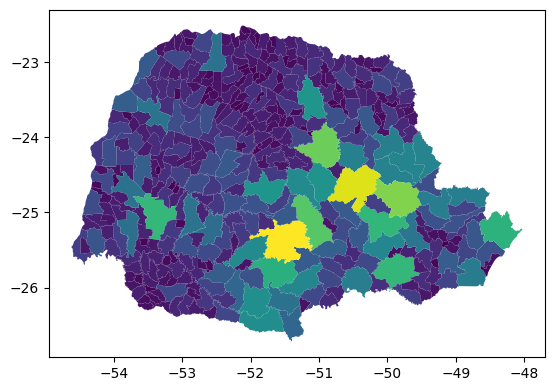

In [23]:
municipio_filter.plot(column='area')

<Axes: >

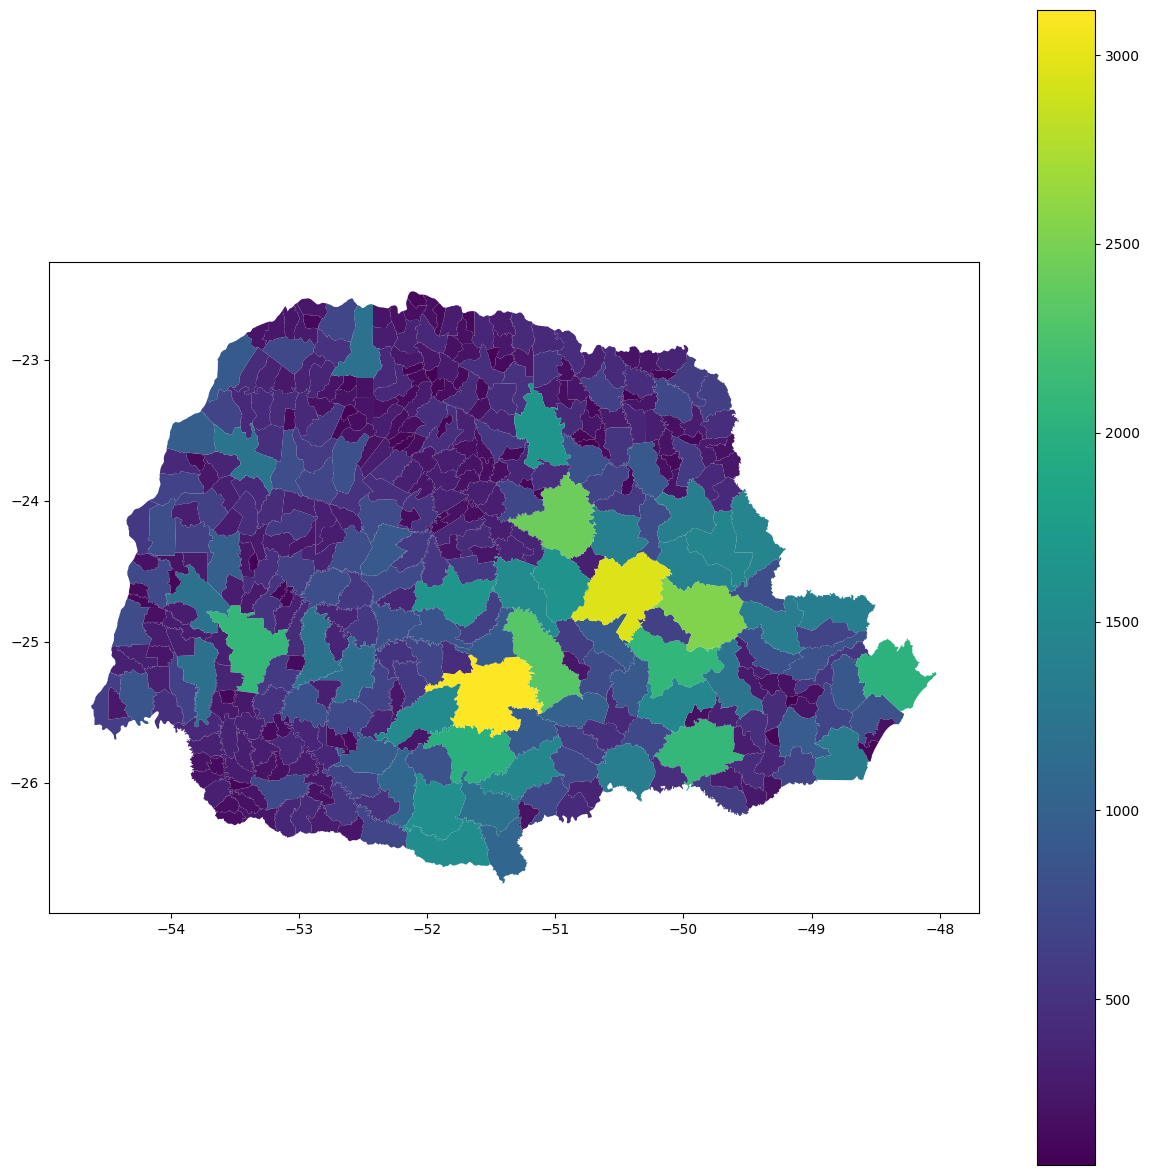

In [33]:
fig, ax = plt.subplots(1,1,figsize = (15,15))
municipio_filter.plot(ax = ax, column= 'area', legend = True)

<Axes: >

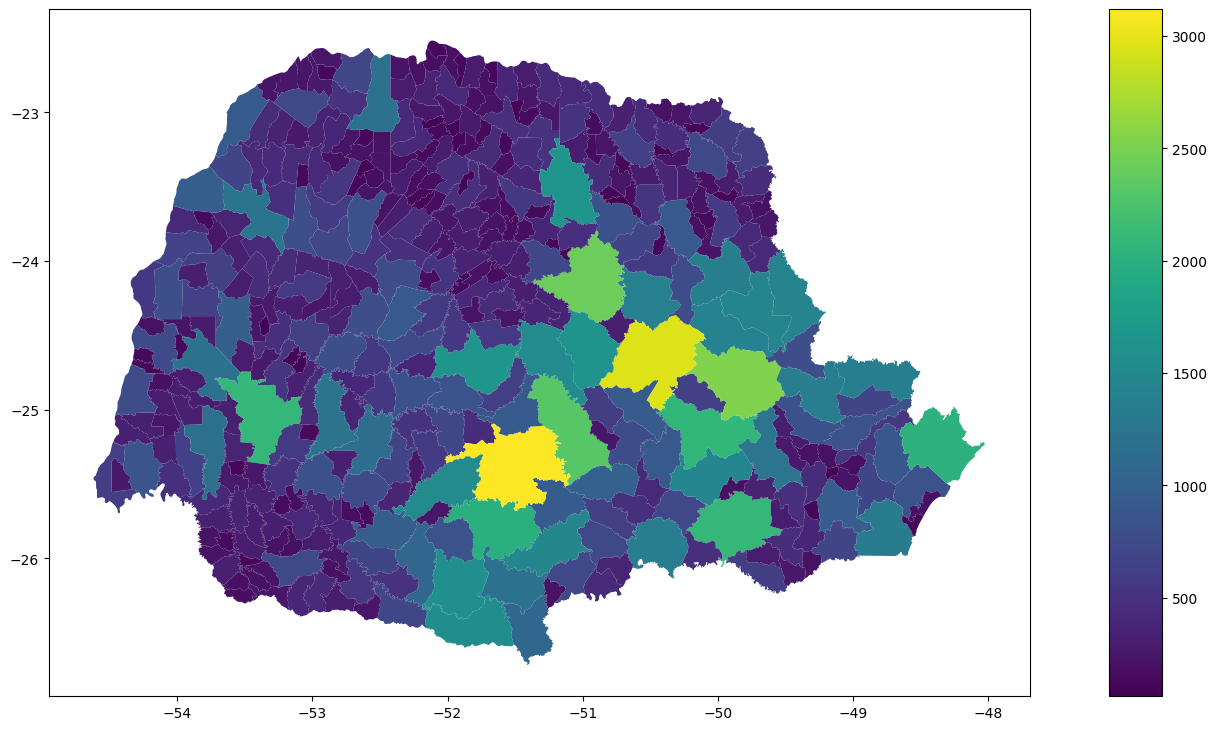

In [36]:
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    fig, ax = plt.subplots(1,1,figsize = (15,15))
    div = make_axes_locatable(ax)
    cax = div.append_axes("right", size ='5%', pad = 0.3)
municipio_filter.plot(ax = ax, column= 'area', legend = True,cax=cax)